# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [44]:
import tensorflow
tensorflow.__version__

'2.2.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
project_path='/content/drive/My Drive/'

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
data_zip_path = project_path + 'Aligned Face Dataset from Pinterest.zip'

In [48]:
from zipfile import ZipFile

with ZipFile(data_zip_path, 'r') as z:
  z.extractall()
print("Data zip extraction done!")



Data zip extraction done!


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
import matplotlib.pyplot as plt
def load_image(path):
    img = cv2.imread(path, 1)
    print("Each image in the data set has a same of {0}".format(img.shape))
    flattened_img = img.flatten()
    print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
    plt.imshow(img)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

Each image in the data set has a same of (301, 299, 3)
The number of features in any image from the data set are: 269997


array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

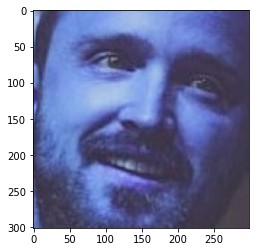

In [51]:
load_image('/content/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [15]:
model = vgg_face()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
model.load_weights("/content/drive/My Drive/vgg_face_weights.h5")

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
(224, 224, 3)
(2622,)


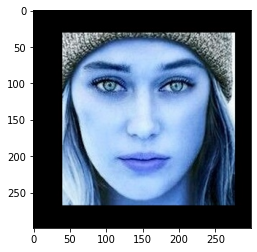

In [18]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

Streaming output truncated to the last 5000 lines.
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (356, 299, 3)
The number of features in any image from the data set are: 319332
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a sam

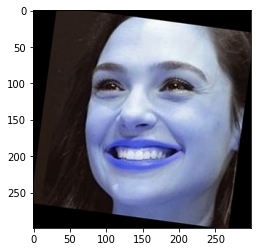

In [19]:

embeddings = np.zeros((metadata.shape[0],2622))
#If there is any error in reading any image in the dataset,fill the embedding vector of that image 
#with 2622 as the final embedding from the model is of length 2622.

for i, m in enumerate(metadata):
    
    img_path = metadata[i].image_path()
    img = load_image(m.image_path())
    #img = align_image(img)
    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    # obtain embedding vector for image
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203


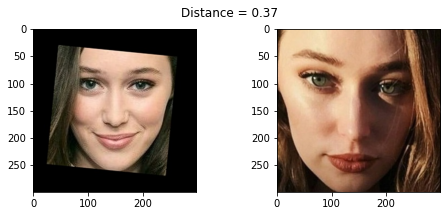

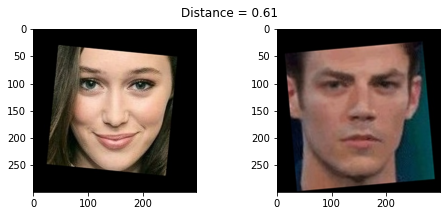

In [52]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2): 
  plt.figure(figsize=(8,3)) 
  plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}') 
  plt.subplot(121) 
  plt.imshow(load_image(metadata[idx1].image_path())) 
  plt.subplot(122) 
  plt.imshow(load_image(metadata[idx2].image_path()));
#Distance between 2, 3 and 2, 180
show_pair(2, 3) 
show_pair(2, 180)

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203


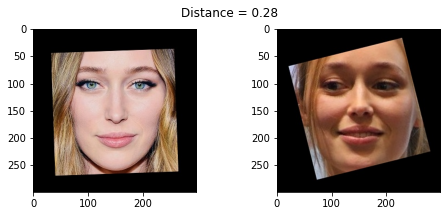

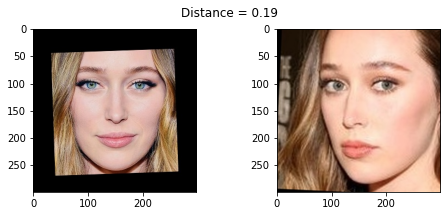

In [53]:
#Distance between 30, 31 and 30, 100
show_pair(30, 31) 
show_pair(30, 100)

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203
Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203


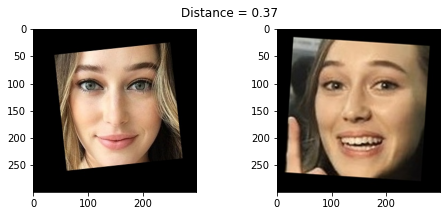

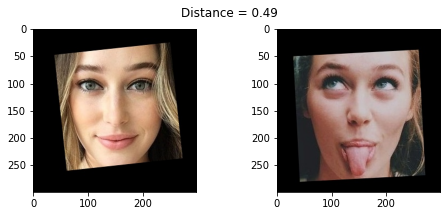

In [54]:
#Distance between 70, 72 and 70, 115
show_pair(70, 72) 
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [56]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
print('shape of training data is:',X_train.shape)
print('\nshape of test data is:',X_test.shape)


shape of training data is: (9573, 2622)

shape of test data is: (1197, 2622)


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)
y_train = y[train_idx]
y_test = y[test_idx]


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [66]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized',whiten=True,random_state=256)
pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=256,
    svd_solver='randomized', tol=0.0, whiten=True)

In [69]:
ratio=np.cumsum(pca.explained_variance_ratio_)
for i in range(1,100):
    print(i, "             ",  "{:0.2%}".format(ratio[i-1]))

1               13.59%
2               18.98%
3               22.99%
4               26.67%
5               30.07%
6               33.19%
7               35.78%
8               38.13%
9               40.23%
10               42.17%
11               43.99%
12               45.69%
13               47.35%
14               48.90%
15               50.33%
16               51.69%
17               53.00%
18               54.21%
19               55.37%
20               56.50%
21               57.59%
22               58.65%
23               59.61%
24               60.55%
25               61.46%
26               62.34%
27               63.17%
28               63.94%
29               64.71%
30               65.44%
31               66.14%
32               66.80%
33               67.43%
34               68.06%
35               68.62%
36               69.16%
37               69.69%
38               70.21%
39               70.71%
40               71.19%
41               71.63%
42               72.06%
4

Max. % Variance of total explained by no. of factors
no. of factors, % variance explained


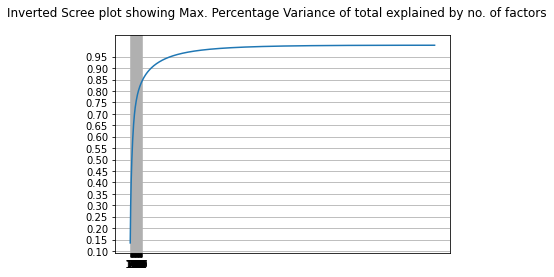

In [70]:
print("Max. % Variance of total explained by no. of factors")
print("no. of factors, % variance explained")
plt.xticks(np.arange(1, 100, 2))
plt.yticks(np.arange(0, 1.0, 0.05))
plt.suptitle('Inverted Scree plot showing Max. Percentage Variance of total explained by no. of factors')
plt.grid()
plt.plot(ratio)
plt.show()

In [72]:
#As we see from above around 80% of the information is covered with 65-72 features.Hence selecting 67 
#as shown above
pca1 = PCA(n_components=71,svd_solver='randomized',whiten=True,random_state=256)
pca1.fit(X_train1)
X_train2 = pca1.transform(X_train1)
X_test2 = pca1.transform(X_test1)
print("train and test data is :",X_train2.shape, X_test2.shape, y_train.shape, y_test.shape)

train and test data is : (9573, 71) (1197, 71) (9573,) (1197,)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [77]:
from sklearn.svm import SVC

from sklearn.metrics import f1_score, accuracy_score
model = SVC(gamma='auto')

model.fit(X_train2,y_train)
acc_svc = accuracy_score(y_test, model.predict(X_test2))
print("Test Accuracy score by SVC",acc_svc)

Test Accuracy score by SVC 0.9598997493734336


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203


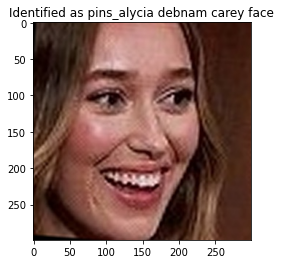

In [78]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = model.predict([X_test2[example_idx]]) #### Add your code here ####
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');